In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Session Log File

In [2]:
log = pd.read_csv('stimlog.txt', sep='\t', names=['Time', 'Level', 'Msg'])
log

,Time,Level,Msg
0,7.7557,WARNING,Monitor specification not found. Creating a te...
1,7.7853,WARNING,User requested fullscreen with size [1024 768...
2,9.5113,EXP,Created leftCard = ImageStim(__class__=<class ...
3,9.5527,EXP,Created middleCard = ImageStim(__class__=<clas...
4,9.5960,EXP,Created rightCard = ImageStim(__class__=<class...
...,...,...,...
1432,49.5085,EXP,rightCard: autoDraw = True
1433,49.5414,EXP,middleCard: autoDraw = False
1434,49.5764,EXP,leftCard: autoDraw = False
1435,49.5764,EXP,rightCard: autoDraw = False


## Get each blink time, for each card.

In [3]:
left = log[log.Msg.str.contains('leftCard: ')].Time.values
middle = log[log.Msg.str.contains('middleCard: ')].Time.values
right = log[log.Msg.str.contains('rightCard: ')].Time.values
np.diff(left[-5:])

array([0.1168, 0.1165, 0.1171, 0.1179])

[Text(0.5, 1.0, '601 Events @ 7.50 Hz'),
 Text(0.5, 0, 'Instantaneous Blink Frequency (Hz)')]

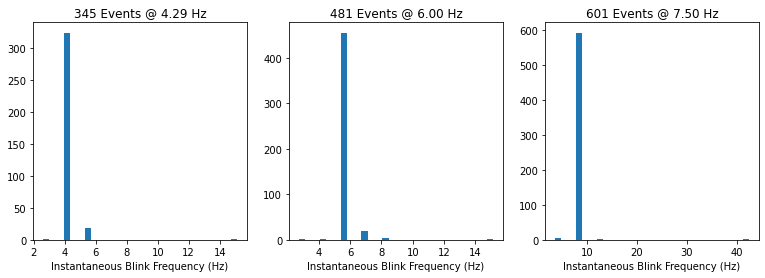

In [5]:
fig, axes = plt.subplots(figsize=(13, 4), ncols=3)
axes[0].hist(0.5 / np.diff(left), rwidth=0.3)
axes[0].set(
    title=f"{len(left)} Events @ {np.median(0.5 / np.diff(left)):.2f} Hz",
    xlabel="Instantaneous Blink Frequency (Hz)",
)

axes[1].hist(0.5 / np.diff(middle), rwidth=0.3)
axes[1].set(
    title=f"{len(middle)} Events @ {np.median(0.5 / np.diff(middle)):.2f} Hz",
    xlabel="Instantaneous Blink Frequency (Hz)",
)

axes[2].hist(0.5 / np.diff(right), rwidth=0.3);
axes[2].set(
    title=f"{len(right)} Events @ {np.median(0.5 / np.diff(right)):.2f} Hz",
    xlabel="Instantaneous Blink Frequency (Hz)",
)
